In [26]:
#import packages
import squarify
from docx import Document
from docx.shared import Inches
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [35]:
# Opening the file as a dataframe
wfc_data = pd.read_csv('Workforce_commission/WFC_Oct23.csv')

In [54]:
#List all departments in the data set
department_list = wfc_data['Department'].unique()
#Provide headcounts for each department
department_headcounts = wfc_data['Department'].value_counts()
print("Department headcounts:", department_headcounts)
#Calculate total headcount, filled department headcount
Total_headcount = wfc_data['Department'].count()
print("Total headcount:", Total_headcount)
#Filter out vacancies from the workforce commission dataset
wfc_excluding_vacancies = wfc_data[wfc_data['Role Status']!= 'Vacancy']
#1.2 Count total filled headcount
Filled_headcount = wfc_excluding_vacancies['Department'].count()
print("Filled headcount:",Filled_headcount)
#Count total filled headcount by department
Filled_department_headcount = wfc_excluding_vacancies['Department'].value_counts()
print("Filled department headcount:",Filled_department_headcount)

# 2.1 Count top filled roles
Top_filled_roles = wfc_excluding_vacancies['Job Role'].value_counts().head(5)
print("Top filled roles:",Top_filled_roles)
#2.3 Employee grade breakdown
Employee_grade_counts = wfc_excluding_vacancies['Employee Grade'].value_counts()
print(Employee_grade_counts)

#Count total SCS and filled SCS and breakdown
SCS_grades = ['8 - SCS1','9 - SCS2','10 - SCS3']
SCS_grade_counts=Employee_grade_counts[Employee_grade_counts.index.isin(SCS_grades)]
#Display results
print("Filled SCS roles:", SCS_grade_counts)
SCS_filled_total=sum(SCS_grade_counts)
print(SCS_filled_total)
#Total SCS including contractor and vacancies
#2.5 Filter rows where the 'Employee Grade' column is either 'SCS1', 'SCS2', or 'SCS3'
SCS_all_data = wfc_data[wfc_data['Employee Grade'].isin(['8 - SCS1','9 - SCS2','10 - SCS3'])]
#SCS all data breakdown
SCS_all_counts = SCS_all_data['Employee Grade'].value_counts()
#2.4 Total SCS including vacancies and contractors
SCS_Total = len(SCS_all_data)  # or SCS_Total = filtered_rows.shape[0]
# Display the count
print(SCS_all_counts)
print(SCS_Total)

#Vacancy numbers
Total_vacancies = Total_headcount - Filled_headcount
print("Total vacancies:", Total_vacancies)

#3.1 Vacancy percentage
Vacancy_percentage = Total_vacancies/Total_headcount
print("Vacancy percentage:", Vacancy_percentage)

#Show vacant roles
wfc_vacancies = wfc_data[wfc_data['Role Status']== 'Vacancy']
#Count total vacancy headcount by job role
Vacancy_job_role_headcount = wfc_vacancies['Job Role'].value_counts()


#Workforce mix
#Resource type counts
Resource_type_counts = wfc_excluding_vacancies['Resource Type'].value_counts()
print("Filled resource type:", Resource_type_counts)

#Filter only civil servants
# Filter rows where the 'Resource Type' column is either 'Civil servant' 'Apprentice', 'Secondment' or 'Fast Streamer'
Civil_service_resource_types = ['Civil Servant', 'Apprentice','Fast Streamer','Secondment','']
Civil_servants = wfc_excluding_vacancies[wfc_excluding_vacancies['Resource Type'].isin(Civil_service_resource_types)]

# Count the number of rows in the filtered DataFrame
Civil_servants_filled_count = Civil_servants['Resource Type'].value_counts()

#Filter only contractors
# Filter rows where the 'Resource Type' column is either 'Contractor' or 'Managed Services' or 'GovCo'
Contractor_resource_types = ['Contractor', 'Managed Services','GovCo']
Contractors = wfc_excluding_vacancies[wfc_excluding_vacancies['Resource Type'].isin(Contractor_resource_types)]

# Count the number of rows in the filtered DataFrame
Contractors_filled_count = Contractors['Resource Type'].value_counts()

# Display counts
print(Civil_servants_filled_count)
Civil_service_filled_sum=sum(Civil_servants_filled_count)
print('Total filled civil servant:', Civil_service_filled_sum)
print(Contractors_filled_count)
Contractors_filled_sum=sum(Contractors_filled_count)
print('Total filled contractors:', Contractors_filled_sum)

#3.2 Display the top 10 vacant role
Top_10_vacant_roles = wfc_vacancies['Job Role'].value_counts().head(10)
print(Top_10_vacant_roles)
#4.1 Civil service and contractor proportions
Civil_service_proportion=Civil_service_filled_sum/Filled_headcount
print('Civil service proportion: ', Civil_service_proportion)
Contractor_proportion=Contractors_filled_sum/Filled_headcount
print('Contractor propotion: ', Contractor_proportion)
#4.2 Display the top 10 contingent labour roles
Top_10_contractors = Contractors['Job Role'].value_counts().head(10)
print(Top_10_contractors)
#8.1 Location data
location_headcount = wfc_excluding_vacancies['Region'].value_counts().head(14)
print(location_headcount)

Department headcounts: Department
Home Office       7846
DWP               5260
HMRC              3874
MoD               3364
MoJ               2173
DfT               2095
Scottish Gov      1914
DLUHC             1414
Cabinet Office    1400
ONS               1389
DEFRA             1360
DfE               1288
DSIT              1183
DBT                876
DHSC               608
FCDO               414
Welsh Gov          370
DESNZ & DSIT       289
FCDO RSO           172
UKEF                96
HM Treasury         82
FSA                 64
DCMS                40
Ofqual              40
Name: count, dtype: int64
Total headcount: 37611
Filled headcount: 32124
Filled department headcount: Department
Home Office       7164
DWP               4439
HMRC              3868
MoD               2439
DfT               1834
Scottish Gov      1691
MoJ               1439
DLUHC             1245
Cabinet Office    1243
DfE               1217
DSIT              1084
ONS               1006
DEFRA              916
DB

In [60]:
#Display the results in a table
#Convert variables and scalar values to dataframes

df_department_headcount_total = pd.DataFrame({'Total Headcount': [Total_headcount]})
df_filled_department_headcount_total = pd.DataFrame({'Total Filled headcount': [Filled_headcount]})
df_department_headcount = pd.DataFrame({'Department': department_headcounts.index, 'Headcount': department_headcounts.values})
df_filled_department_headcount = pd.DataFrame({'Department': Filled_department_headcount.index, 'Filled headcount': Filled_department_headcount.values})
df_top_filled_roles = pd.DataFrame({'Top filled roles': Top_filled_roles.index, 'Headcount': Top_filled_roles.values})
df_employee_grade = pd.DataFrame({'Employee grade': Employee_grade_counts.index, 'Filled headcount': Employee_grade_counts.values})
df_SCS_grades = pd.DataFrame({'Employee grade': SCS_grade_counts.index, 'Filled headcount': SCS_grade_counts.values})
df_SCS_total = pd.DataFrame({'SCS filled headcount': [SCS_filled_total]})
df_vacancy_rate = pd.DataFrame({'Overall vacancy rate':[Vacancy_percentage]})
df_top_vacant_roles = pd.DataFrame({'Job role': Top_10_vacant_roles.index, 'Headcount': Top_10_vacant_roles.values})
df_civil_servant_percentage = pd.DataFrame({'Civil servant percentage':[Civil_service_proportion]})
df_contingent_labour_percentage = pd.DataFrame({'Contingent labour percentage':[Contractor_proportion]})
df_top_10_contractors = pd.DataFrame({'Job Role': Top_10_contractors.index, 'Contractor Count': Top_10_contractors.values})
df_location_headcount = pd.DataFrame({'Region': location_headcount.index, 'Headcount': location_headcount.values})

# Concatenate the DataFrames horizontally
df_combined = pd.concat([df_department_headcount_total, df_filled_department_headcount_total, df_department_headcount, df_filled_department_headcount,df_top_filled_roles, df_employee_grade, df_SCS_grades, df_SCS_total, df_vacancy_rate, df_top_vacant_roles, df_civil_servant_percentage, df_contingent_labour_percentage, df_top_10_contractors, df_location_headcount], axis=1)

# Display the combined DataFrame
print(df_combined)

    Total Headcount  Total Filled headcount      Department  Headcount  \
0           37611.0                 32124.0     Home Office       7846   
1               NaN                     NaN             DWP       5260   
2               NaN                     NaN            HMRC       3874   
3               NaN                     NaN             MoD       3364   
4               NaN                     NaN             MoJ       2173   
5               NaN                     NaN             DfT       2095   
6               NaN                     NaN    Scottish Gov       1914   
7               NaN                     NaN           DLUHC       1414   
8               NaN                     NaN  Cabinet Office       1400   
9               NaN                     NaN             ONS       1389   
10              NaN                     NaN           DEFRA       1360   
11              NaN                     NaN             DfE       1288   
12              NaN                   

In [62]:
# Export to CSV
df_combined.to_csv('wfc_key_metrics.csv', index=False)

In [30]:
#print text on the total number of vacancies and vacancies as % of the total workforce
print("The workforce commission reported a total of",Total_vacancies,"vacancies which amounts to",round(Vacancy_percentage*100),"% of the total workforce (",Total_headcount,").")
#Top vacant roles text
text1 = print(Top_10_vacant_roles.index[0],"was the top reported vacant role at",Top_10_vacant_roles.iloc[0],",followed by", Top_10_vacant_roles.index[1],Top_10_vacant_roles.iloc[1],"and",Top_10_vacant_roles.index[2],Top_10_vacant_roles.iloc[2],".")

The workforce commission reported a total of 5487 vacancies which amounts to 15 % of the total workforce ( 37611 ).
Software developer was the top reported vacant role at 697 ,followed by Delivery manager 375 and Business analyst 368 .


/var/folders/l8/xlbdr9nd5sn3q7t9dd5lkqq80000gp/T/ipykernel_44319/3929553691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete
/var/folders/l8/xlbdr9nd5sn3q7t9dd5lkqq80000gp/T/ipykernel_44319/3929553691.py:5: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete


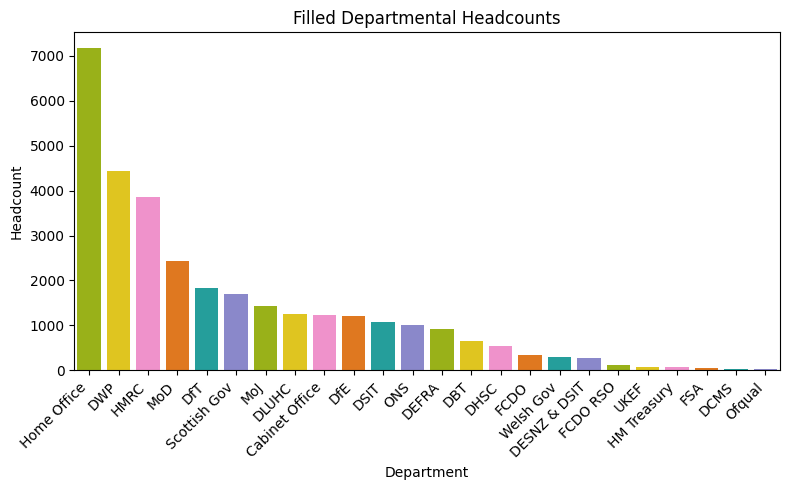

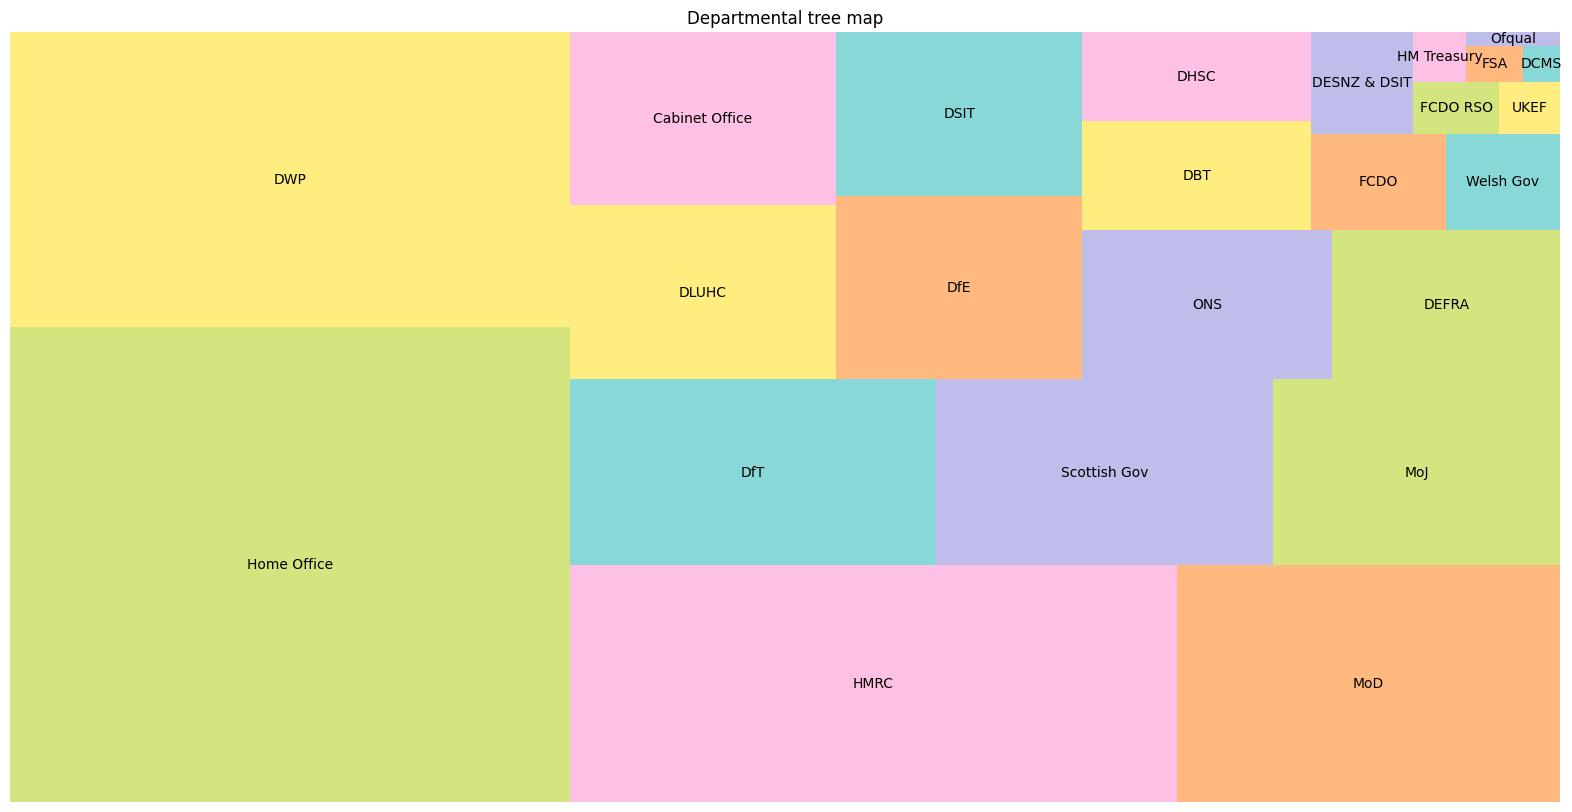

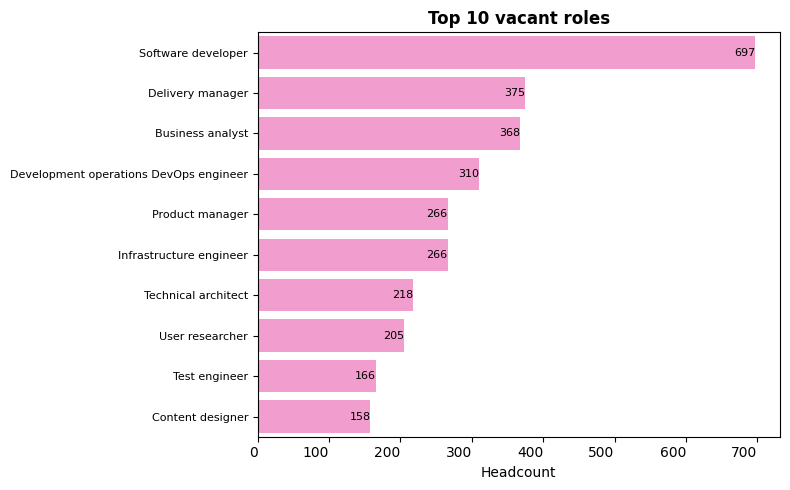

In [31]:
#Create a colour pallete
custom_palette = sns.color_palette(["#aaca00","#ffdc00","#ff82ce","#ff7500","#11b2ae","#807dd5"])
#Apply colour palette
plt.figure(figsize=(8, 5))  # Set the figure size
headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete
plt.title('Filled Departmental Headcounts')  # Set the title of the plot
plt.xlabel('Department')  # Set the label for the x-axis
plt.ylabel('Headcount')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

# Create a DataFrame for plotting filled headcount
filled_plot_data = pd.DataFrame({'unique_value': Filled_department_headcount.index, 'count': Filled_department_headcount.values})
#Plot a tree map
plt.figure(figsize=(20, 10))
squarify.plot(sizes=filled_plot_data['count'], label=filled_plot_data['unique_value'], color = custom_palette, alpha=0.5)
plt.axis('off')
plt.title('Departmental tree map')
plt.show()

#create visual of the top 10 vacancies
#bar chart using Seaborn
plt.figure(figsize=(8, 5))  # Set the figure size
barplot = sns.barplot(y=Top_10_vacant_roles.index, x=Top_10_vacant_roles.values, color='#ff8fcf')  # Create the bar plot
plt.title('Top 10 vacant roles',fontweight='bold')  # Set the title of the plot
plt.xlabel('Headcount')  # Set the label for the x-axis
plt.ylabel('')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Adjust font size of y-axis labels
plt.yticks(fontsize=8)  # Set the font size for y-axis labels
#Add labels to the end of each bar for headcount
for index, value in enumerate(Top_10_vacant_roles.values):
    barplot.text(value, index, str(value), va='center', ha='right', fontsize=8)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()  # Display the plot

In [32]:
#Define the plot
vacancy_plot = barplot.get_figure()
#Save the plot to a file
vacancy_plot.savefig('vacancy_plot.png')
#Headcount plot
headcount_plot =headcount_barplot.get_figure()
headcount_plot.savefig('headcount_plot.png')

#Create a word document
doc = Document()
#Add a heading to the Word document
doc.add_heading('1. Size of the workforce', level=0)

#Add text on the overall vacancies to the word document
doc.add_paragraph(f"There are {Filled_headcount} Government Digital and Data professionals working across the government. This includes contingent labour but does not include vacancies.")
# Add the plot image to the Word document
doc.add_picture('headcount_plot.png', width=Inches(6))  # Adjust the width as needed

#Add a heading to the Word document
doc.add_heading('2. Skills and roles', level=0)
#Top 5 filled roles
doc.add_paragraph(f"The top 5 filled roles are {Top_filled_roles}.")
#Employee grade breakdown
doc.add_paragraph(f"The employee grade breakdown is {Employee_grade_counts}.")
#SCS breakdown
doc.add_paragraph(f"The SCS breakdown is:{SCS_all_counts}.")
doc.add_paragraph(f"The total number of SCS is {SCS_Total}.")

#Add a heading to the Word document
doc.add_heading('3. Demand and vacancy', level=0)

# Add the plot image to the Word document
doc.add_picture('vacancy_plot.png', width=Inches(6))  # Adjust the width as needed

# Add text to the Word document
#Add text on the overall vacancies to the word document
doc.add_paragraph(f"The workforce commission reported a total of {Total_vacancies} vacancies which amounts to {round(Vacancy_percentage*100)}% of the total workforce ({Total_headcount}).")

# Add text on the top vacant roles to the word document
doc.add_paragraph(f"{Top_10_vacant_roles.index[0]} was the top reported vacant role at {Top_10_vacant_roles.iloc[0]}, followed by {Top_10_vacant_roles.index[1]} {Top_10_vacant_roles.iloc[1]} and {Top_10_vacant_roles.index[2]} {Top_10_vacant_roles.iloc[2]}.")

#Add a heading to the Word document
doc.add_heading('4. Workforce mix', level=0)
#Workforce mix stats
doc.add_paragraph(f"Civil service proportion: {round(Civil_service_proportion*100)}%.")
doc.add_paragraph(f"Contingent labour proportion: {round(Contractor_proportion*100)}%.")

doc.add_paragraph(f"Top 10 contractor roles: {round(Top_10_contractors)}.")

#Add a heading to the Word document
doc.add_heading('5. Development programmes', level=0)
#Add a heading to the Word document
doc.add_heading('6. Pay and retention', level=0)
#Add a heading to the Word document
doc.add_heading('7. Location', level=0)
doc.add_paragraph(f"{location_headcount}")

# Save the Word document
wfc_test_doc = 'wfc_test_document.docx'
doc.save(wfc_test_doc)

print(f"Word document created successfully: {wfc_test_doc}")

# Display the plot
plt.show()

Word document created successfully: wfc_test_document.docx
